<a href="https://colab.research.google.com/github/pepeto24/datascience/blob/main/Analisando_os_Dados_do_Airbnb_(Oslo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Análise dos Dados do Airbnb - *Oslo*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Oslo, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [38]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #biblioteca dos mapas de calor

In [39]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/norway/oslo/oslo/2020-12-31/visualisations/listings.csv")

## Análise dos Dados
Nesta etapa iremos criar uma consciência situacional inicial e permitir um entendimento de como os dados são estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dia

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [40]:
# mostrar as 5 primeiras entradas
df.head()

#aqui nós visualizamos as 5 primeiras entradas do arquivo, muito útil para identificar padrões óbvios como o de neighbourhood_group que aparenta ter muitos valores NaN.

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,42932,"Charming apartment, Oslo Center, Ro",187463,Cecilie,NaN,Frogner,59.91234,10.72384,Entire home/apt,1999,3,38,2020-01-13,0.43,1,1
1,69964,Lovely flat in Oslo city centre,175633,Kris,NaN,Sagene,59.93898,10.77360,Entire home/apt,427,28,7,2013-05-18,0.06,1,301
2,71725,Central big room - ap with balcony,368229,Reidun,NaN,Gamle Oslo,59.90611,10.78000,Private room,524,4,50,2020-03-12,0.42,1,365
3,77108,Friendly & spacious in uptown Oslo,412523,Gunn Hild,NaN,Frogner,59.92478,10.71649,Entire home/apt,2210,7,15,2019-12-28,0.13,1,358
4,92103,Trendy Urban Downtown Oslo.,496205,Dorte,NaN,Grünerløkka,59.91975,10.75466,Entire home/apt,1261,3,20,2013-08-18,0.17,1,365



### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

É muito importante identificar a quantidade de entradas de nosso conjunto de dados. Isto ajuda para mensurarmos a quantidade de linhas e colunas, além dos tipos de dados que estamos trabalhando.

In [41]:
# identificar o volume de dados do DataFrame
print("Linhas:\t {}".format(df.shape[0]))
print("Colunas:\t {}".format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Linhas:	 3010
Colunas:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Correspondem aos valores 'NaN'. Identificar esses valores e sua intensidade nos ajudará a limpar o nosso conjunto de dados.

Note que,

* A coluna `neighbourhood_group` possui 100% dos seus valores faltantes. Isto é, todos assumem valor NaN.
* As colunas `reviews_per_month` e `last_review` possuem valores nulos em quase metade de suas linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0.1% valores nulos.

In [42]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)  

#a formula acima é simples: pegamos o somatório de 'celulas vazias' e dividimos pelo número de colunas.

neighbourhood_group               1.000000
reviews_per_month                 0.182060
last_review                       0.182060
name                              0.000332
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Plotando o histograma para estudarmos a distribuição de variáveis.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6abc74c400>,
      dtype=object)

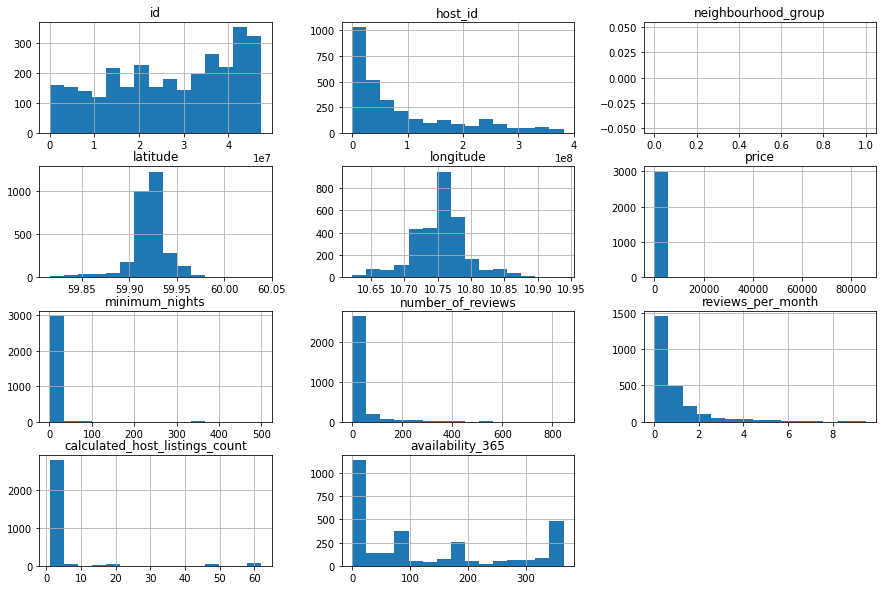

In [43]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10))

### **Q4. Há *outliers* presentes?**


### **Q4. Qual a média dos preços de aluguel?**

A partir do histograma é possível identificar a presença de *outliers*. Isto é, valores que não seguem uma distribuição e distorcem a nossa representação gráfica. Há duas maneiras rápidas que auxiliam a detecção de *outliers*.

São elas:

* Resumo estatístico por meio do método `describe()`.
* Plotar `boxplots` para a variável.

In [44]:
#ver o resumo estatistico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3010.000000,3010.000000,3010.000000,2462.000000,3010.000000,3010.000000
mean,1148.915947,5.086711,25.840199,0.889813,3.775415,126.621262
std,2042.174465,18.608474,57.085979,1.147310,10.573489,136.473223
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,565.250000,2.000000,1.000000,0.200000,1.000000,0.000000
50%,819.500000,2.000000,6.000000,0.490000,1.000000,87.000000
75%,1214.000000,4.000000,23.000000,1.060000,2.000000,237.500000
max,85800.000000,500.000000,844.000000,9.490000,62.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 1214, porém seu valor máximo é 85800.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano. A quantidade máxima de `mininum_nights` é de 500 dias!

#### Boxplot para minimum_nights


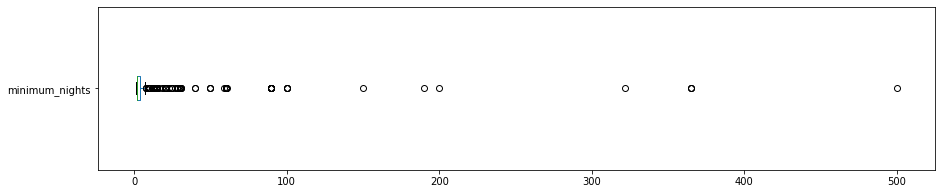

minimum_nights: valores acima de 30:
38 entradas
1.2625%


In [54]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

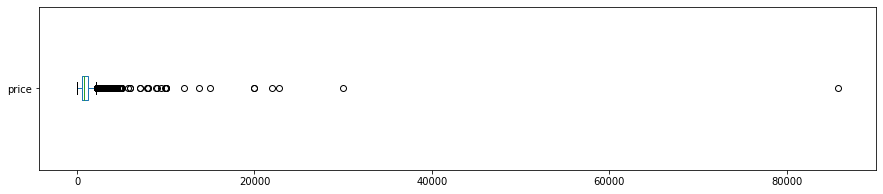


price: valores acima de 2000
271 entradas
9.0033%


In [60]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 2000 para price
print("\nprice: valores acima de 2000")
print("{} entradas".format(len(df[df.price > 2000])))
print("{:.4f}%".format((len(df[df.price > 2000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

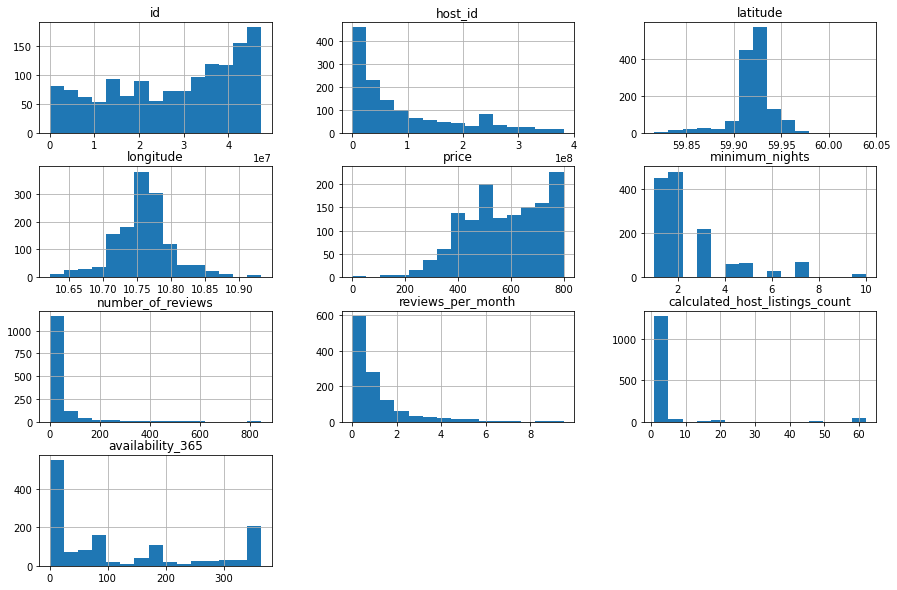

In [65]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 800].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 10].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [68]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
#mostra a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.112792,-0.129939,-0.174160,0.005354,-0.019833
minimum_nights,0.112792,1.000000,-0.128353,-0.180209,0.106461,0.027924
number_of_reviews,-0.129939,-0.128353,1.000000,0.835389,-0.062029,0.034012
reviews_per_month,-0.174160,-0.180209,0.835389,1.000000,0.021158,0.006197
calculated_host_listings_count,0.005354,0.106461,-0.062029,0.021158,1.000000,0.209527
availability_365,-0.019833,0.027924,0.034012,0.006197,0.209527,1.000000


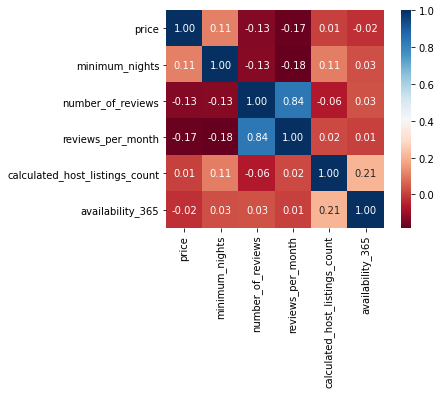

In [69]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [70]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    802
Private room       554
Shared room         24
Hotel room           2
Name: room_type, dtype: int64

In [71]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.580318
Private room       0.400868
Shared room        0.017366
Hotel room         0.001447
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [72]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Stovner           629.250000
Sagene            597.579365
Grünerløkka       594.209622
Frogner           582.133641
Ullern            582.046512
Vestre Aker       579.444444
Gamle Oslo        576.093617
St. Hanshaugen    569.293413
Bjerke            557.269231
Grorud            553.363636
Name: price, dtype: float64

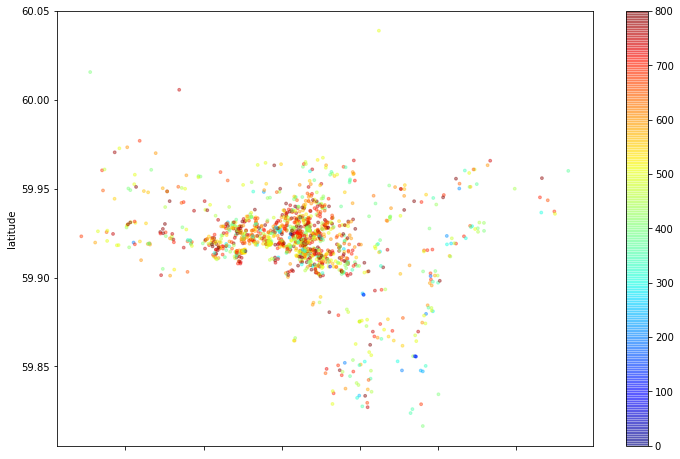

In [74]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial.